In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train= pd.read_csv("../input/titanic/train.csv")

In [4]:
test= pd.read_csv("../input/titanic/test.csv")
gender= pd.read_csv("../input/titanic/gender_submission.csv")

Start with basic EDA of the available dataests.

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
dtype: int64

cabin feature in this dataset has more than 50%  missing data. Also this will not help in our model taining. Therefore, We must drop this feature.

In [18]:
train= train.drop(columns=['Cabin'])

KeyError: "['Cabin'] not found in axis"

Missing value treatment

In [19]:
feature= ['Age', 'Embarked']
train[feature]= train[feature].fillna(train[feature].mode().iloc[0])

In [20]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dropping irrelevant features

In [21]:
train= train.drop(columns=['Name', 'Ticket'])

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Coversion of categorical variables into numerical variabls

In [23]:
train['Sex']= train["Sex"].astype('category').cat.codes

In [24]:
train['Embarked']=train['Embarked'].astype('category').cat.codes

Convert all numerical variables into integer type

In [25]:
train['Fare']= train['Fare'].round(0).astype(int)

In [26]:
train=train.astype('int64')

In [27]:
train.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Fare           int64
Embarked       int64
dtype: object

EDA

In [28]:
train.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

importing libraries for visualization

In [29]:
import matplotlib as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

AttributeError: module 'matplotlib' has no attribute 'show'

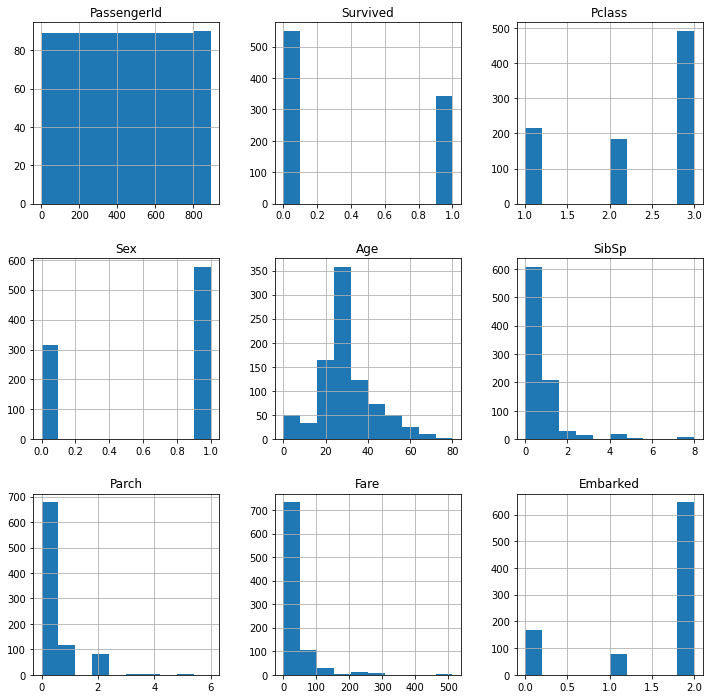

In [30]:
train.hist(figsize=(12,12))
plt.show()

AttributeError: module 'matplotlib' has no attribute 'xlable'

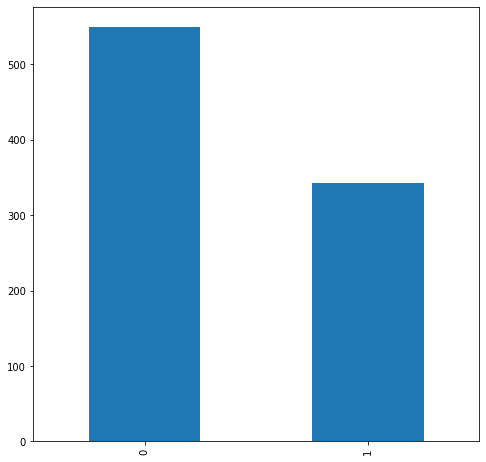

In [31]:
train.Survived.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlable('Survived')
plt.ylable('count')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'xlable'

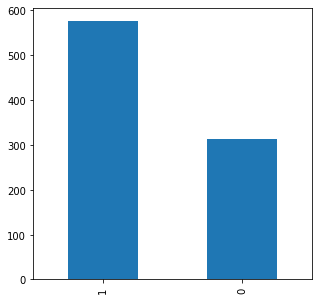

In [32]:
train.Sex.value_counts().plot( kind= 'bar', figsize=(5,5))
plt.xlable('Sex')
plt.ylable('count')
plt.show()

In [33]:
import seaborn as sns
import statistics

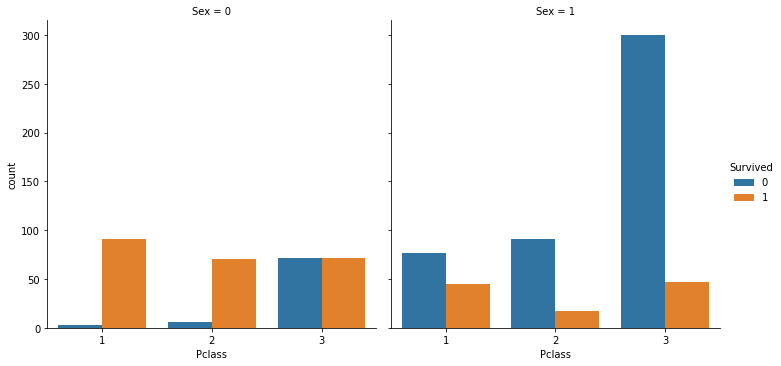

In [34]:
sns.catplot(x='Pclass',data= train,kind='count',hue='Survived',col='Sex')

The above visualization clearly shows that male in every category has higher chances of survival.

AttributeError: module 'matplotlib' has no attribute 'show'

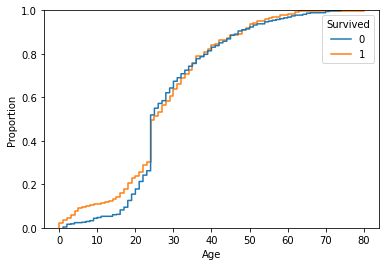

In [35]:
sns.ecdfplot(x='Age', data= train,hue='Survived')
plt.show()

In [36]:
co_relation=train.corr()

In [37]:
co_relation['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Age           -0.052883
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257088
Survived       1.000000
Name: Survived, dtype: float64

splitting train dataset into training and testing datasets in order to train the model.

In [38]:
import sklearn
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [40]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

separating features and lables

In [41]:
y= train['Survived']
x= train.drop(columns=['Survived','PassengerId','Fare','Age'])

In [42]:
y.shape

(891,)

In [43]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
y_train.shape

(712,)

In [45]:
x_train.shape


(712, 5)

In [46]:
y_test.shape

(179,)

In [47]:
x_test.shape

(179, 5)

In [48]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

712
712
179
179


Training the dataset to get best model

In [49]:
logit= LogisticRegression()
logit.fit(x_train,y_train)
predict_1=logit.predict(x_test)


In [50]:
train_accuracy= round(logit.score(x_train,y_train)*100)
test_accuracy= round(accuracy_score(predict_1,y_test)*100)

In [51]:
print("Logistic Regression Train Accuracy Score : {}%".format(train_accuracy))
print("Logistic Regression Test Accuracy Score : {}%".format(test_accuracy))

Logistic Regression Train Accuracy Score : 80%
Logistic Regression Test Accuracy Score : 80%


In [52]:
print(classification_report(predict_1, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       116
           1       0.70      0.76      0.73        63

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.80      0.80       179



In [53]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
predict_2=dt.predict(x_test)

In [54]:
train_accuracy= round(dt.score(x_train,y_train)*100)
test_accuracy= round(accuracy_score(predict_2,y_test)*100)

In [55]:
print("Decision Tree Train Accuracy Score :{}%".format(train_accuracy))
print("Decision Tree Test Accuracy Score :{}%".format(test_accuracy))

Decision Tree Train Accuracy Score :84%
Decision Tree Test Accuracy Score :82%


In [56]:
print(classification_report(predict_2,y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       121
           1       0.68      0.81      0.74        58

    accuracy                           0.82       179
   macro avg       0.79      0.81      0.80       179
weighted avg       0.83      0.82      0.82       179



In [57]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
prdict_3=nb.predict(x_test)

In [58]:
train_accuracy= round(nb.score(x_train,y_train)*100)
test_accuracy= round(accuracy_score(prdict_3,y_test)*100)

In [59]:
print("NB Train Accuracy Score :{}%".format(train_accuracy))
print("NB test Accuracy Score :{}%".format(test_accuracy))

NB Train Accuracy Score :64%
NB test Accuracy Score :65%


In [60]:
print(classification_report(prdict_3,y_test))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       151
           1       0.25      0.61      0.35        28

    accuracy                           0.65       179
   macro avg       0.57      0.63      0.55       179
weighted avg       0.80      0.65      0.69       179



In [61]:
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
prdict_= rfc.predict(x_test)

In [62]:
train_accuracy= round(rfc.score(x_train,y_train)*100)
test_accuracy= round(accuracy_score(prdict_,y_test)*100)

In [63]:
print("Random Forest Train Accuracy Score :{}%".format(train_accuracy))
print("Random Forest Test Accuracy Score :{}%".format(test_accuracy))

Random Forest Train Accuracy Score :84%
Random Forest Test Accuracy Score :81%


In [64]:
print(classification_report(prdict_,y_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       120
           1       0.68      0.80      0.73        59

    accuracy                           0.81       179
   macro avg       0.79      0.81      0.79       179
weighted avg       0.82      0.81      0.81       179



In [65]:
sgd= SGDClassifier()
sgd.fit(x_train, y_train)
predict_4=sgd.predict(x_test)

In [66]:
train_accuracy=round(sgd.score(x_train,y_train)*100)
test_accuracy= round(accuracy_score(predict_4,y_test)*100)


In [67]:
print("SVM Train Accuracy Score :{}%".format(train_accuracy))
print("SVM Test Accuracy Score :{}%".format(test_accuracy))
print(classification_report(predict_4,y_test))

SVM Train Accuracy Score :78%
SVM Test Accuracy Score :79%
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       102
           1       0.78      0.70      0.74        77

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [68]:
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x_train,y_train)
predict_5= knn.predict(x_test)

In [69]:
tain_accuracy= round(knn.score(x_train,y_train)*100)
test_accuracy=round(accuracy_score(predict_5,y_test)*100)


In [70]:
print("KNN Train Accuracy Score :{}%".format(train_accuracy))
print("KNN Test Accuracy Score :{}%".format(test_accuracy))

KNN Train Accuracy Score :78%
KNN Test Accuracy Score :80%


In [71]:
print(classification_report(predict_5,y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       124
           1       0.64      0.80      0.71        55

    accuracy                           0.80       179
   macro avg       0.77      0.80      0.78       179
weighted avg       0.82      0.80      0.80       179



In [72]:
svc=SVC(probability=True)
svc.fit(x_train,y_train)
predict_6=svc.predict(x_test)

In [73]:
train_accuracy= round(svc.score(x_train,y_train)*100)
test_accuracy=round(accuracy_score(predict_6,y_test)*100)

In [74]:
print("SVC Train Accuracy Score:{}%".format(train_accuracy))
print("SVS test Accuracy Score:{}%".format(test_accuracy))
print(classification_report(predict_6,y_test))

SVC Train Accuracy Score:81%
SVS test Accuracy Score:80%
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       118
           1       0.68      0.77      0.72        61

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



After doing all iterations I found model prepared by RFC is the best followed by Decision Tree.

Now let's Prepare test dataset for applying RFC model

In [75]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Dropping all irrelevant columns

In [77]:
test= test.drop(columns=['Age','Name','Cabin','Fare','Ticket'])

In [78]:
test['Sex']=test.Sex.astype('category').cat.codes
test['Embarked']=test.Embarked.astype('category').cat.codes

In [79]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked
0,892,3,1,0,0,1
1,893,3,0,1,0,2
2,894,2,1,0,0,1
3,895,3,1,0,0,2
4,896,3,0,1,1,2


In [80]:
test.dtypes

PassengerId    int64
Pclass         int64
Sex             int8
SibSp          int64
Parch          int64
Embarked        int8
dtype: object

In [81]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [82]:
test=test.astype('int64')

Let's apply the best model on Test Dataset 

In [83]:
test_id= test['PassengerId']
test_x=test.drop(columns='PassengerId')

In [84]:
test_y_predict=rfc.predict(test_x)

In [85]:
final_result=pd.DataFrame(list(zip(test_id,test_y_predict)),columns=['PassengerId','Survived'])

In [86]:
final_result.head(50)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


In [87]:
final_result.to_csv('final_result.csv',index=False)